In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [38]:
df = pd.read_csv("./HospitalAdmissionsData.csv")
df

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda
...,...,...,...,...,...,...,...,...,...,...
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis


In [8]:
#a. What are the column headers or features in this data set?
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [15]:
#b. How many features are floats? 
types = df.dtypes
float_count = 0
for i in types:
    if(i == 'float64'):
       float_count += 1
float_count

1

In [27]:
#b. How many are integers?
int_count = 0
for i in types:
    if(i == 'int64'):
       int_count += 1

int_count


ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
dtype: object

In [31]:
#c. Which features are objects (non-numeric variables)?
types[types == object]

Admission_Type    object
Insurance_Type    object
Religion_Type     object
Race              object
Dx                object
dtype: object

In [35]:
#d. What are the possible 'values' for insurance type?
df["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [36]:
#e. Show the summary statistics for the admission length.
df["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [47]:
#f. What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
mode_df = df.mode()
print("Admission Length: " + str(mode_df["AdmissionLengthDays"][0]))
print("Insurance type: " + str(mode_df["Insurance_Type"][0]))
print("Religion: " + str(mode_df["Religion_Type"][0]))
print("Race: " + str(mode_df["Race"][0]))
print("Dx: " + str(mode_df["Dx"][0]))

Admission Length: 5.28125
Insurance type: medicare
Religion: catholic
Race: white
Dx: newborn


Desctiption: Most of the admission lengths are within the first 50 days, where the longest stay is almost 300 days


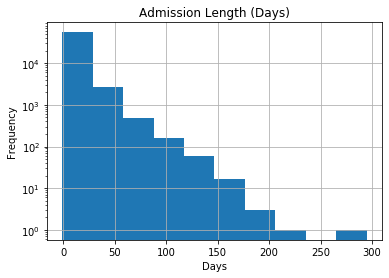

In [64]:
#g Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale.
df.hist("AdmissionLengthDays", log = True)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title("Admission Length (Days)")
print("Desctiption: Most of the admission lengths are within the first 50 days, where the longest stay is almost 300 days")

Death_1
0    10.140012
1    10.129606
Name: AdmissionLengthDays, dtype: float64


Text(0.5, 1.0, 'Admission Length ')

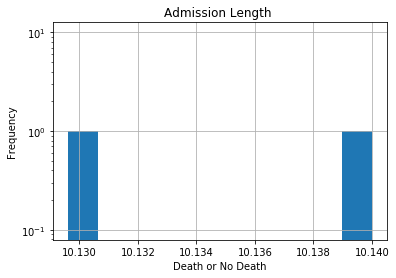

In [96]:
#h. Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.

death = df.groupby("Death_1")["AdmissionLengthDays"]
print(death.mean())
death.mean().hist(log = True)
plt.xlabel('Death or No Death')
plt.ylabel('Frequency')
plt.title("Admission Length ")




Text(0.5, 1.0, 'Association between Death and Insurance')

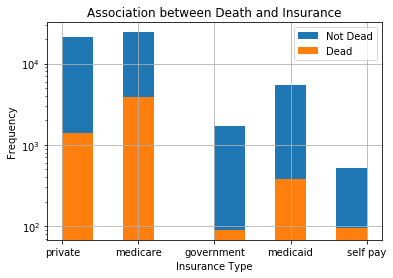

In [105]:
#i. Describe the association between death and insurance type and show a visualization or test.
dth_insur = df.groupby("Death_1")["Insurance_Type"]
dth_insur.hist(log = True)
plt.legend({"Not Dead", "Dead"})
plt.xlabel('Insurance Type')
plt.ylabel('Frequency')
plt.title("Association between Death and Insurance")

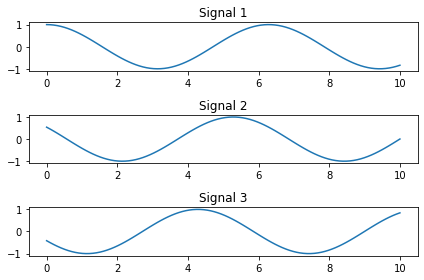

In [112]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']
plt.subplot(3,1,1)
plt.plot(x, y1)
plt.title(names[0])
plt.subplot(3,1,2)
plt.plot(x, y2)
plt.title(names[1])
plt.subplot(3,1,3)
plt.plot(x, y3)
plt.title(names[2])
plt.tight_layout()